In [70]:
import osmnx as ox
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import geocoder
from heapq import heappush, heappop

import pandas as pd
%matplotlib inline




#### CMU AFRICA coordinates with road network

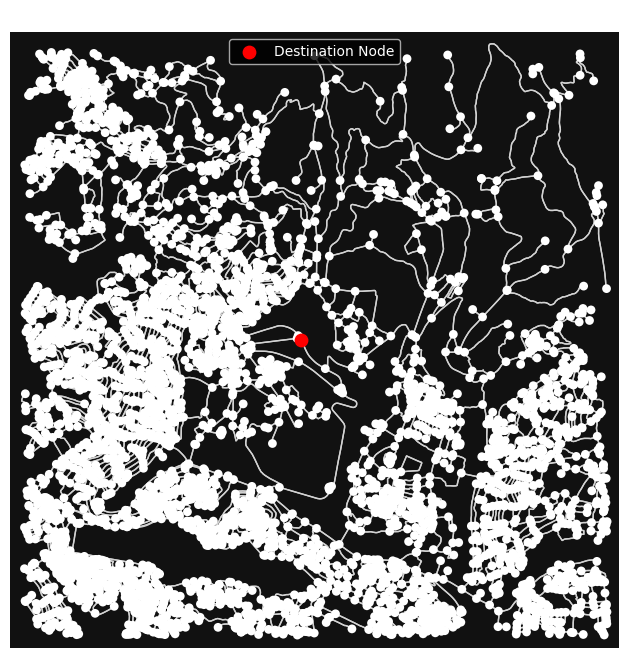

In [71]:
# Get CMU-Africa coordinates (approximate)

latitude = -1.935460
longitude = 30.158601

# Download the street network within 20 km radius
road = ox.graph_from_point((latitude, longitude), dist=5000, network_type='drive')

# Find the nearest node to the coordinates
nearest_node = ox.distance.nearest_nodes(road, longitude, latitude)

# Get its attributes
cmu_africa_node = road.nodes[nearest_node]

# Plot the road network
fig, ax = ox.plot_graph(road, show=False, close=False, node_color='white', node_size=40, edge_color='lightgray')

# Highlight the destination node in red
x, y = cmu_africa_node['x'], cmu_africa_node['y']
ax.scatter(x, y, c='red', s=80, label='Destination Node', zorder=5)

# Add legend
plt.legend()
plt.title("Road Network with Highlighted Destination Node", color='white')
plt.show()

####  User Current Location  

In [72]:
def get_user_location():
    """
    Detect the user's current GPS location automatically using IP.
    If automatic detection fails, prompt the user to manually enter
    their latitude and longitude.

    Returns:
        (lat, lon): tuple of floats
    """
    print("Detecting your current location...")

    try:
        # Option 1: Automatically detect user location via IP
        g = geocoder.ip('me')

        if g.ok and g.latlng:
            user_lat, user_lon = g.latlng
            print("Automatic GPS detection successful!")
            print(f"Detected location: Latitude = {user_lat}, Longitude = {user_lon}")

        else:
            # Option 2: Fallback to manual entry
            print("Could not detect location automatically.")
            print("Please enter your coordinates manually (for example, from Google Maps):")
            user_lat = float(input("Latitude: "))
            user_lon = float(input("Longitude: "))

    except Exception as e:
        # Complete fallback in case of unexpected errors
        print("Automatic detection error.")
        print(f"Error: {e}")
        print("Please manually enter your coordinates:")
        user_lat = float(input("Latitude: "))
        user_lon = float(input("Longitude: "))

    return user_lat, user_lon



#### Nearest Node  Method

In [73]:

def get_nearest_node_Id(road,longitude,latitude):
    nearest_node_id = ox.distance.nearest_nodes(road, longitude, latitude)
    return nearest_node_id

In [74]:
#### A* search Algo

In [75]:
def a_star(road, start_node_id, dest_node_id):
    # Priority queue: (f_score, current_node, path_so_far, cost_so_far)
    open_list = []
    heappush(open_list, (0, start_node_id, [start_node_id], 0))

    g_costs = {start_node_id: 0}

    while open_list:
        f_score, current, path, cost_so_far = heappop(open_list)

        # Goal reached → return path
        if current == dest_node_id:
            return path

        for neighbor in road.neighbors(current):

            current_coords = (road.nodes[current]['y'], road.nodes[current]['x'])
            neighbor_coords = (road.nodes[neighbor]['y'], road.nodes[neighbor]['x'])
            dest_coords = (road.nodes[dest_node_id]['y'], road.nodes[dest_node_id]['x'])
            #calculate the minimum edge distance of the current to the neighbour
            min_edge_distance=float("inf")
            for k,data in road.get_edge_data(current,neighbor).items():
                 min_edge_distance=min(min_edge_distance,data.get("length"))
                        # g(n): real known distance so far
            g = cost_so_far + min_edge_distance
            # If we have already found a cheaper way to reach this node, skip it
            if neighbor in g_costs and g >= g_costs[neighbor]:
                continue

            g_costs[neighbor] = g

            # h(n): heuristic distance (straight line)
            h = geodesic(neighbor_coords, dest_coords).meters

            # f(n) = g(n) + h(n)
            f = g + h

            heappush(open_list, (f, neighbor, path + [neighbor], g))

    return None  # No path found


#### Plot The best route method

In [76]:
def plot_network(str_node_id,dest_node_id,path):
 #Compute the shortest path between start and destination
 #path = ox.routing.shortest_path(road, [start_node], [destination_node], weight='length')[0]

# Plot the graph with default settings
 fig, ax = ox.plot_graph(road, show=False, close=False, node_color='white', edge_color='white', node_size=40)

# Extract x and y coordinates of the nodes along the path
 x = [road.nodes[n]['x'] for n in path]
 y = [road.nodes[n]['y'] for n in path]

# Highlight the path edges in red
 ax.plot(x, y, color='red', linewidth=3, label='Path Taken', zorder=4)

# Highlight start and destination nodes
 ax.scatter(road.nodes[str_node_id]['x'], road.nodes[str_node_id]['y'], c='green', s=80, label='Start Node', zorder=5)
 ax.scatter(road.nodes[dest_node_id]['x'], road.nodes[dest_node_id]['y'], c='blue', s=80, label='Destination Node', zorder=5)

# Style and show the plot
 plt.style.use('dark_background')
 plt.legend()
 plt.title("Shortest Path from Start to Destination (Using Geocoder)", color='Red')
 plt.show()

#### Get user current location , Get the best route

In [77]:
long_user,lat_user=get_user_location()
latitude_cmu_africa = -1.935460
longitude_cmu_africa = 30.158601



dest_node_id=get_nearest_node_Id(road,longitude_cmu_africa,latitude_cmu_africa)
print("dest",dest_node_id)
start_node_id=get_nearest_node_Id(road,long_user,lat_user)
print("src",start_node_id)
a_star_path=a_star(road, start_node_id, dest_node_id)
print(a_star_path) 



Detecting your current location...
Automatic GPS detection successful!
Detected location: Latitude = -1.95, Longitude = 30.0588
dest 6285412683
src 6288171304
[6288171304, 6288171292, 11184749143, 6280101950, 1396703218, 6288171259, 6243463432, 1396703224, 1396703226, 6243396449, 1396703228, 6243481261, 1440895923, 1440895932, 10908659615, 1396703232, 1440895935, 6243481250, 6287799067, 1396703236, 1440895951, 1396703238, 1400158595, 1396703239, 6287677610, 6280077098, 6280077097, 6287677601, 6245957205, 1396703248, 6245960835, 5508999615, 6246031962, 6245960843, 6245957197, 6245960856, 1396703256, 6245975302, 6280168210, 6280168197, 6245971662, 6280168228, 6280161250, 6280168211, 6287467273, 1396703267, 6287476038, 6280170340, 6287476032, 6287476030, 6287476036, 6263100373, 6263100377, 6263100378, 6263100352, 6263100359, 10965723098, 13247431774, 3654721045, 3861084532, 3861084534, 3654721039, 6285412682, 6285412679, 3820695121, 3820695105, 3820695108, 6285412683]


#### Visualize the best route from the start node to CMU Africa

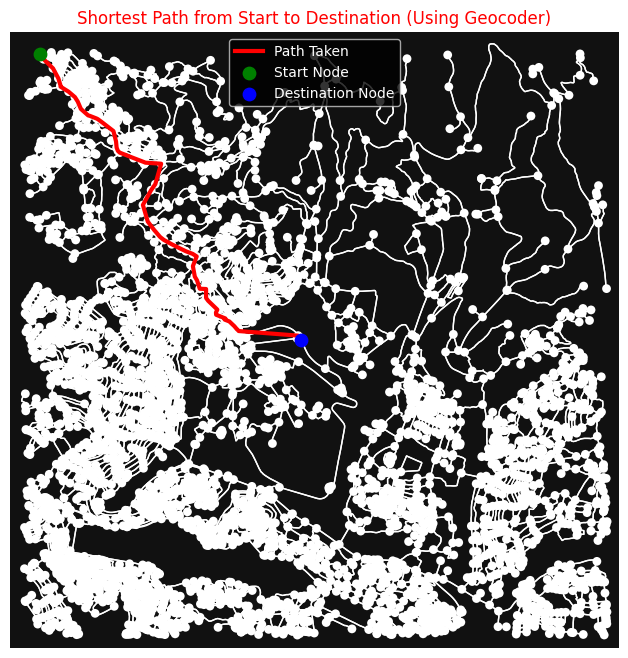

In [78]:
plot_network(start_node_id,dest_node_id,a_star_path)

#### Comparing  A* search algorithm with OSMNX Shortest Path

In [79]:
path = ox.routing.shortest_path(road, [start_node_id], [dest_node_id], weight='length')[0]

print(path)

df = pd.DataFrame({
    'A* Path': a_star_path,
    'OSMNX Shortest Path': path
})

if path == a_star_path:
    print("The A* path matches the shortest path provided by the OSMNX Library.")
else:
    print("The  A* path and the shortest path provided by the OSMNX Library doesn't match.")    
df

[6288171304, 6288171292, 11184749143, 6280101950, 1396703218, 6288171259, 6243463432, 1396703224, 1396703226, 6243396449, 1396703228, 6243481261, 1440895923, 1440895932, 10908659615, 1396703232, 1440895935, 6243481250, 6287799067, 1396703236, 1440895951, 1396703238, 1400158595, 1396703239, 6287677610, 6280077098, 6280077097, 6287677601, 6245957205, 1396703248, 6245960835, 5508999615, 6246031962, 6245960843, 6245957197, 6245960856, 1396703256, 6245975302, 6280168210, 6280168197, 6245971662, 6280168228, 6280161250, 6280168211, 6287467273, 1396703267, 6287476038, 6280170340, 6287476032, 6287476030, 6287476036, 6263100373, 6263100377, 6263100378, 6263100352, 6263100359, 10965723098, 13247431774, 3654721045, 3861084532, 3861084534, 3654721039, 6285412682, 6285412679, 3820695121, 3820695105, 3820695108, 6285412683]
The A* path matches the shortest path provided by the OSMNX Library.


,A* Path,OSMNX Shortest Path
0,6288171304,6288171304
1,6288171292,6288171292
2,11184749143,11184749143
3,6280101950,6280101950
4,1396703218,1396703218
...,...,...
63,6285412679,6285412679
64,3820695121,3820695121
65,3820695105,3820695105
66,3820695108,3820695108


#### Plot path method

In [80]:
def plot_Astar_Path(edge_ids, text=" "):
 fig, ax = ox.plot_graph(
    road,
    show=False,
    close=False,
    node_color='white',
    edge_color='white',
    node_size=40,
    edge_linewidth=0.5,
 )

 # Draw the PATH using node coordinates
 path_nodes = [u for (u, v, osmid) in edge_ids] + [edge_ids[-1][1]]

 x = [road.nodes[n]['x'] for n in path_nodes]
 y = [road.nodes[n]['y'] for n in path_nodes]

 # Draw the path as a polyline
 ax.plot(
    x, y,
    color='red',
    linewidth=3,
    label='Path Taken',
    zorder=4
)

# Highlight each edge explicitly (optional but accurate)
 for u, v, osmid in edge_ids:
    x_edge = [road.nodes[u]['x'], road.nodes[v]['x']]
    y_edge = [road.nodes[u]['y'], road.nodes[v]['y']]

    ax.plot(
        x_edge, y_edge,
        color='red',
        linewidth=3,
        zorder=4
    )

# highlight start & destination
 start_node = edge_ids[0][0]
 end_node   = edge_ids[-1][1]

 ax.scatter(
    road.nodes[start_node]['x'],
    road.nodes[start_node]['y'],
    c='green',
    s=80,
    label='Start Node',
    zorder=5
)

 ax.scatter(
    road.nodes[end_node]['x'],
    road.nodes[end_node]['y'],
    c='blue',
    s=80,
    label='Destination Node',
    zorder=5
)

# Style
 plt.style.use('dark_background')
 plt.legend()
 plt.title(f"Path Visualization {text} ", color='Green')
 plt.show()

#### Get edges of a path method

In [81]:
def get_path_edge_ids(path):
 node_pairs = list(zip(path[:-1], path[1:]))

 edge_ids = []

# Iterate through the list of node pairs (u, v)
 for u, v in node_pairs:
    try:
        for k, data in road[u][v].items():
            osmid = data.get('osmid')
            if osmid:
                edge_ids.append((u, v, osmid))
                # Break the inner loop if you only need the first edge's osmid
                break 

    except KeyError:
        print(f"Warning: Edge ({u}, {v}) not found in the graph G.")
    except Exception as e:
        print(f"An error occurred for edge ({u}, {v}): {e}")
 return edge_ids


#### Visualize A* search path network using Manual Coordinates

src 1225285201


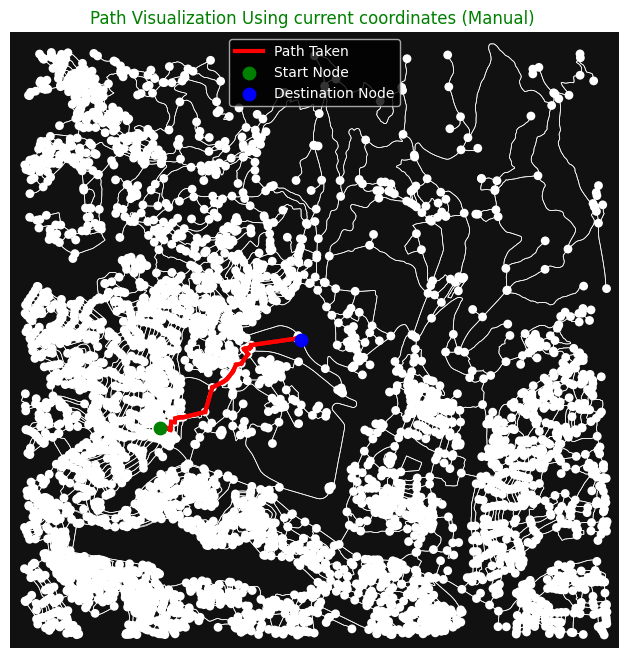

In [82]:
start_node_id=get_nearest_node_Id(road,30.135034,-1.948881)
print("src",start_node_id)
a_star_path=a_star(road, start_node_id, dest_node_id)

edge_ids=get_path_edge_ids(a_star_path)
plot_Astar_Path(edge_ids, "Using current coordinates (Manual)")

Test number 2

In [83]:
#-1.948881, 30.135034

start_node_id=get_nearest_node_Id(road,30.187653,-1.960344)
print("src",start_node_id)
a_star_path=a_star(road, start_node_id, dest_node_id)
print(a_star_path)


src 3697415204
[3697415204, 3697415189, 3697415174, 3697415163, 3697415161, 3697415155, 3697415147, 1397430756, 1397430738, 3697405694, 10870123568, 1397430603, 10870123527, 1397430539, 10870159084, 6285379023, 6285379031, 10870090160, 6270843486, 6270843489, 6270843490, 1394012704, 1394012361, 1394655749, 6270843494, 6270847375, 6285491283, 6285415852, 1218957498, 1218957349, 1612891385, 1394655665, 1394655642, 8563393756, 1394655657, 1394655666, 6278111443, 1394655805, 1394655765, 6285412683]


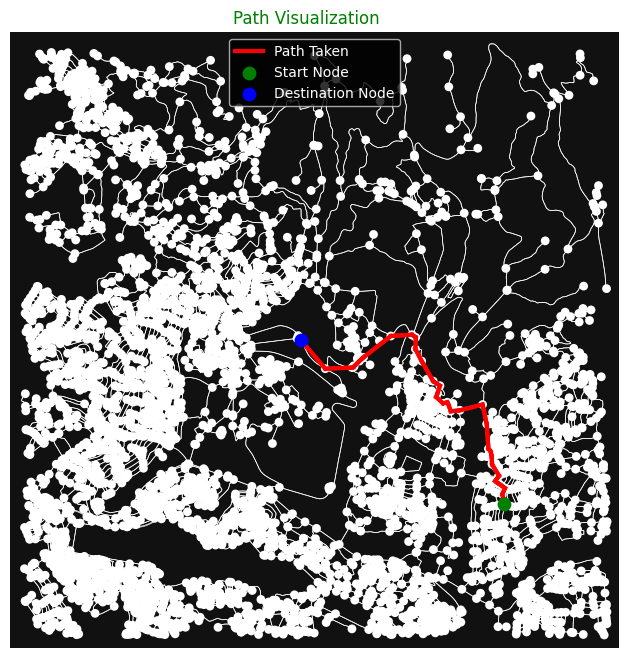

In [84]:
edge_ids=get_path_edge_ids(a_star_path)
plot_Astar_Path(edge_ids)

In [85]:
path = ox.routing.shortest_path(road, [start_node_id], [dest_node_id], weight='length')[0]

print(path)

df = pd.DataFrame({
    'A* Path': a_star_path,
    'OSMNX Shortest Path': path
})

if path == a_star_path:
    print("The A* path matches the shortest path provided by the OSMNX Library.")
else:
    print("The  A* path and the shortest path provided by the OSMNX Library doesn't match.")    
df

[3697415204, 3697415189, 3697415174, 3697415163, 3697415161, 3697415155, 3697415147, 1397430756, 1397430738, 3697405694, 10870123568, 1397430603, 10870123527, 1397430539, 10870159084, 6285379023, 6285379031, 10870090160, 6270843486, 6270843489, 6270843490, 1394012704, 1394012361, 1394655749, 6270843494, 6270847375, 6285491283, 6285415852, 1218957498, 1218957349, 1612891385, 1394655665, 1394655642, 8563393756, 1394655657, 1394655666, 6278111443, 1394655805, 1394655765, 6285412683]
The A* path matches the shortest path provided by the OSMNX Library.


,A* Path,OSMNX Shortest Path
0,3697415204,3697415204
1,3697415189,3697415189
2,3697415174,3697415174
3,3697415163,3697415163
4,3697415161,3697415161
5,3697415155,3697415155
6,3697415147,3697415147
7,1397430756,1397430756
8,1397430738,1397430738
9,3697405694,3697405694
